# Loading dataset MNIST

In [1]:
import tensorflow as tf

# Loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("MNIST dataset loaded and normalized.")
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
MNIST dataset loaded and normalized.
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


# Feedforward NN (Q1)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Feedforward neural network model
# FFNN
model = Sequential([
    Flatten(input_shape=(28, 28)), # Input layer
    Dense(128, activation='relu'), # Hidden layer 1
    Dense(64, activation='relu'),  # Hidden layer 2
    Dense(10, activation='softmax') # Output layer
])

# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model_FFNN = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8658 - loss: 0.4671 - val_accuracy: 0.9593 - val_loss: 0.1346
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9645 - loss: 0.1195 - val_accuracy: 0.9663 - val_loss: 0.1082
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9772 - loss: 0.0735 - val_accuracy: 0.9733 - val_loss: 0.0937
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9836 - loss: 0.0531 - val_accuracy: 0.9712 - val_loss: 0.0953
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9876 - loss: 0.0387 - val_accuracy: 0.9732 - val_loss: 0.0880
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9892 - loss: 0.0331 - val_accuracy: 0.9746 - val_loss: 0.0954
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9911 - loss: 0.0268 - val_accuracy: 0.9737 - val_loss: 0.1041
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9911 - loss: 0.0263 

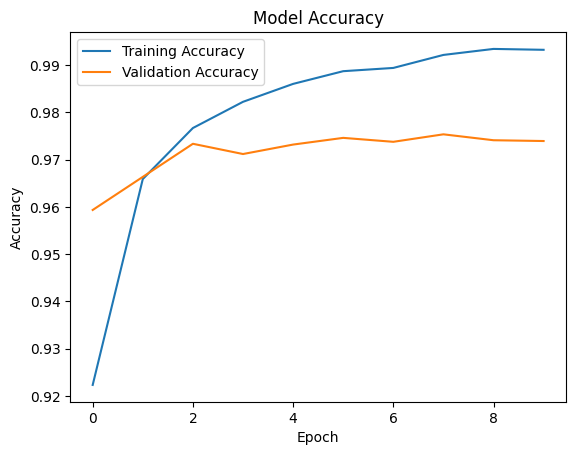

Text(0, 0.5, 'Loss')

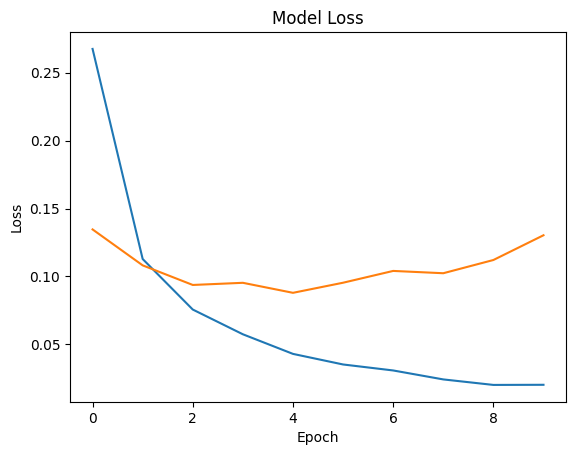

In [9]:
import matplotlib.pyplot as plt

# training and validation accuracy
plt.plot(model_FFNN.history['accuracy'], label='Training Accuracy')
plt.plot(model_FFNN.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# training and validation loss
plt.plot(model_FFNN.history['loss'], label='Training Loss')
plt.plot(model_FFNN.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# CNN(Q2)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model_CNN = Sequential([

    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),# Convolutional layer with 32 filters, kernel size 3x3
    MaxPooling2D(pool_size=(2, 2)), # Max pooling layer with pool size 2x2
    Dropout(0.25), # Dropout layer with a dropout rate of 0.25
    Conv2D(64, kernel_size=(3, 3), activation='relu'), #convolutional layer
    MaxPooling2D(pool_size=(2, 2)),# Max pooling layer with pool size 2x2
    Dropout(0.25),# dropout rate of 0.25
    Flatten(), # Flatten the output from the convolutional layers
    Dense(128, activation='relu'),# hidden layer
    Dropout(0.5), #dropout rate of 0.5
    Dense(10, activation='softmax') #output layer
])

# Compile the model
model_CNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_CNN.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model_CNN = model_CNN.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 36ms/step - accuracy: 0.8217 - loss: 0.5518 - val_accuracy: 0.9782 - val_loss: 0.0700
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 58s 38ms/step - accuracy: 0.9673 - loss: 0.1100 - val_accuracy: 0.9843 - val_loss: 0.0505
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 75s 34ms/step - accuracy: 0.9737 - loss: 0.0871 - val_accuracy: 0.9856 - val_loss: 0.0444
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9777 - loss: 0.0713 - val_accuracy: 0.9894 - val_loss: 0.0380
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9810 - loss: 0.0612 - val_accuracy: 0.9899 - val_loss: 0.0342
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.9833 - loss: 0.0552 - val_accuracy: 0.9911 - val_loss: 0.0317
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - accuracy: 0.9856 - loss: 0.0474 - val_accuracy: 0.9897 - val_loss: 0.0374
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9865 -

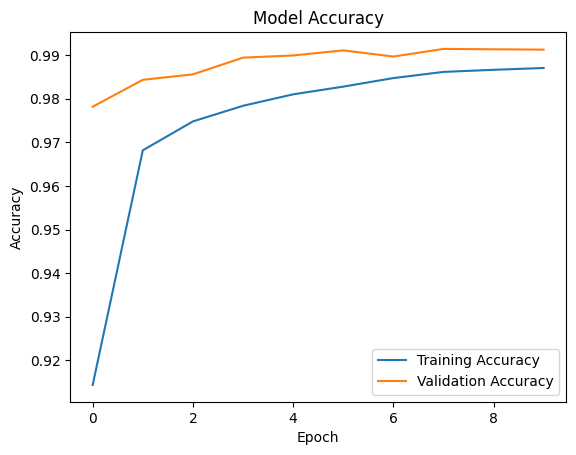

Text(0, 0.5, 'Loss')

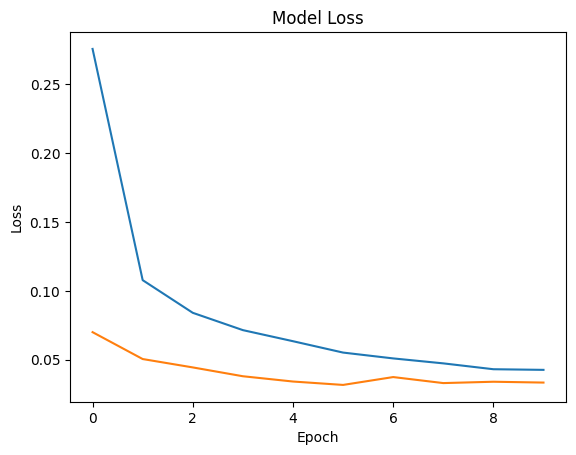

In [13]:
import matplotlib.pyplot as plt

# training and validation accuracy
plt.plot(model_CNN.history['accuracy'], label='Training Accuracy')
plt.plot(model_CNN.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# training and validation loss
plt.plot(model_CNN.history['loss'], label='Training Loss')
plt.plot(model_CNN.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

#LSTM (Q3)

In [43]:
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset
(x_train_imdb, y_train_imdb), (x_test_imdb, y_test_imdb) = imdb.load_data(num_words=10000)

In [47]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences to a fixed length
maxlen = 256
x_train_imdb = pad_sequences(x_train_imdb, maxlen=maxlen)
x_test_imdb = pad_sequences(x_test_imdb, maxlen=maxlen)

print("IMDB dataset loaded, tokenized, and padded.")
print("Training data shape:", x_train_imdb.shape)
print("Testing data shape:", x_test_imdb.shape)

IMDB dataset loaded, tokenized, and padded.
Training data shape: (25000, 256)
Testing data shape: (25000, 256)


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Build the LSTM model
model_LSTM = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=maxlen), # Embedding layer
    LSTM(128), # LSTM layer
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
model_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_LSTM.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Compile, train, and evaluate accuracy.

In [48]:
model_LSTM_history = model_LSTM.fit(x_train_imdb, y_train_imdb, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 278s 439ms/step - accuracy: 0.6970 - loss: 0.5614 - val_accuracy: 0.8376 - val_loss: 0.3924
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 268s 430ms/step - accuracy: 0.8644 - loss: 0.3219 - val_accuracy: 0.8658 - val_loss: 0.3440
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 320s 427ms/step - accuracy: 0.9306 - loss: 0.1848 - val_accuracy: 0.8708 - val_loss: 0.3580
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 323s 429ms/step - accuracy: 0.9493 - loss: 0.1372 - val_accuracy: 0.7570 - val_loss: 0.5102
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 341s 461ms/step - accuracy: 0.9502 - loss: 0.1334 - val_accuracy: 0.8386 - val_loss: 0.4495


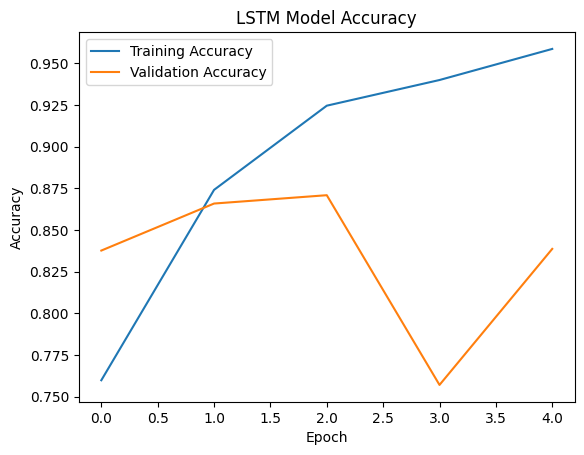

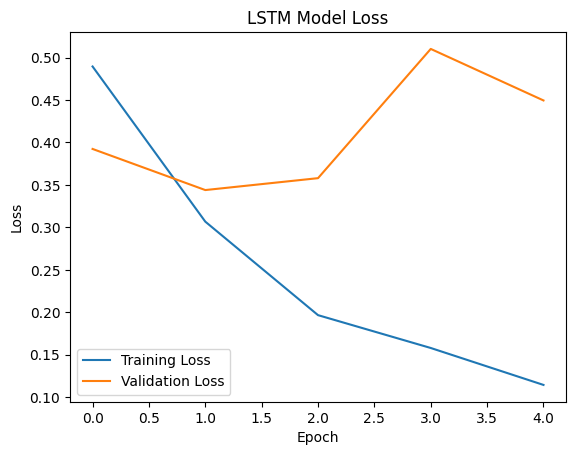

In [50]:
import matplotlib.pyplot as plt

#  training and validation accuracy
plt.plot(model_LSTM_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_LSTM_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# training and validation loss
plt.plot(model_LSTM_history.history['loss'], label='Training Loss')
plt.plot(model_LSTM_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()